# TD3. Le Neurone - Solutions

## Modèle Integrate-and-Fire

Considérons un neurone "Integrate-and-Fire" décrit par l'équation suivante
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. 
Considérons les paramètres: $\tau=20$ ms, $R=1$, $\Theta=20$.

## E1 Solution analytique du modèle Integrate-and-Fire

A) Quel est le potentiel de la membrane de repos - ou le point fixe - (pour $t\rightarrow \infty$) du neurone décrit ci-dessus? <br>

**Réponse :**
Le potentiel de membrane de repos : $dV/dt = 0$, $0 = -V_0 + RI$,  $\rightarrow$ $V_0 = RI$. <br>

B) Vérifiez que $$V(t) = RI + (V_0 - RI) \exp(-t/\tau)$$ est une solution de l'équation différentielle ($V_0 = V(t=0)$). <br>

**Indice**: Rappelez que $\frac{d}{dt} \left( e^{f(t)} \right) = e^{f(t)} \frac{df(t)}{dt}$


**Réponse :** 
Calculons d'abord la dérivée temporelle de $V$. 

$$ \frac{dV}{dt} = \frac{d}{dt} \{ RI + (V_0 - RI) \exp(-t/\tau) \} $$
$$ = \frac{d}{dt} \{ (V_0 - RI) \exp(-t/\tau) \} $$
$$ = (V_0 - RI) \frac{d}{dt} \{ \exp(-t/\tau) \} $$
$$ = (V_0 - RI) \exp(-t/\tau)  \frac{d}{dt}(-t/\tau)$$
$$ = (V_0 - RI) \exp(-t/\tau) (-1/\tau) $$

Nous allons maintenant insérer la dérivée temporelle et la fonction de $V(t)$ dans l'équation différentielle ci-dessus.

$$\tau \frac{dV}{dt} = -V + RI.$$
$$\tau  (V_0 - RI) \exp(-t/\tau) (-1/\tau) = -RI - (V_0 - RI) \exp(-t/\tau) + RI$$
$$- (V_0 - RI) \exp(-t/\tau) = - (V_0 - RI) \exp(-t/\tau) $$

Les deux côtés de l'équation sont égaux. En effet, la solution satisfait à l'équation différente. 

C) Tracer le potentiel en fonction du temps pour un intervalle $t = [0,10]$ s avec $I = 30$ et $V_0 = V(t=0) = 0$.  <br>


Text(0,0.5,'potentiel de la membrane')

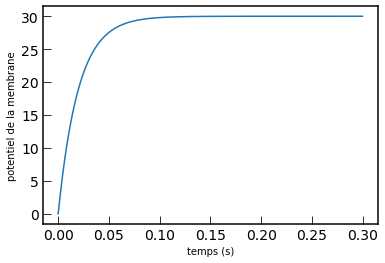

In [22]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

R = 1.
tau = 0.02
Theta = 20.
I = 30.
V0 = 0.

t = np.linspace(0,0.3,1000)
V = lambda t: R*I + (V0 - R*I)*np.exp(-t/tau)

plt.plot(t,V(t))
plt.xlabel('temps (s)')
plt.ylabel('potentiel de la membrane')

## E2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $\Theta$. Le potentiel est remis à $V \rightarrow 0$ après le potentiel d'action. <br>
A) Quelle doit être la taille du courant pour que le neurone puisse déclencher des potentiels d'action? <br>

**Réponse :**
La valeur asymptotique du potentiel membranaire doit être supérieure au seuil de spike. <br>
$ \Theta \leq V_0 = R I$, $\rightarrow I \geq \Theta/R$

B) Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'input externe $I$ en utilisant la solution décrite ci-dessus. 
<br>
**Indice**: Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=0$ à $V(T)=\Theta$. Le taux de décharge en fonction de l'input est alors donnée par $f(I) = 1/T(I)$. 

**Réponse :**
$$V(T) = RI (1 - \exp(-T/\tau)) = \Theta$$ 
$$T = \tau \log \left( \frac{RI}{RI - \Theta} \right)$$
$$ f(t) = 1/T $$ 
$$f(I) = \left( \tau \log \left( \frac{RI}{RI - \Theta} \right) \right)^{-1}$$

C) Quelle est le taux de décharge pour $I = 10, 30, 50$ ? Tracez le taux de décharge $f$ en fonction de l'entrée $I$. Que se passe-t-il si la résistance d'entrée, $R$, est modifiée ? 

In [23]:
R = 1.
tau = 0.02
Theta = 20.
I = 30.
V0 = 0.

f = lambda I: 1/(tau *np.log(R*I/(R*I - Theta)))

print('Taux de decharge pour I = 10, 30, 50 : 0, %.3f, %.3f Hz' % (f(30),f(50)))

Taux de decharge pour I = 10, 30, 50 : 0, 45.512, 97.881 Hz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


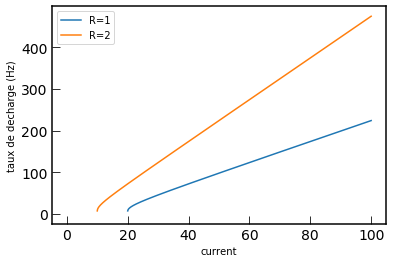

In [24]:
I = np.linspace(0,100,1000)


f = lambda I,R: 1/(tau *np.log(R*I/(R*I - Theta)))
plt.plot(I,f(I,1),label='R=1')
plt.plot(I,f(I,2),label='R=2')
plt.xlabel('current')
plt.ylabel('taux de decharge (Hz)')
plt.legend()

Le seuil et la pente de la courbe f-I changent pour une résistance d'entrée différente. 

## E3 Neurone Integrate-and-Fire avec retard

Considérons maintenant un neurone avec une période réfractaire (une période après le spike pendant laquelle il n'intègre pas d'inputs). La période réfractaire dure une durée $D$. <br>
A) Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms? <br>
**Indice**: Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ influence $T$. 

**Réponse :**
Le taux de décharge diminue en raison de la période réfractaire. Ceci est dû au fait que les 5 ms sont ajoutés à l'intervalle inter-spike. 

B) Quelle est la nouvelle expression pour $f(I)$? <br>

**Réponse :**
$$T' = T + D = \tau \log \left( \frac{RI}{RI - \Theta} \right) + D$$
$$ f'(t) = 1/T' $$ 
$$f(I) = \left( \tau \log \left( \frac{RI}{RI - \Theta} \right) + D \right)^{-1}$$

C) Aussi, tracer $f$ en fonction de $I$. <br> 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


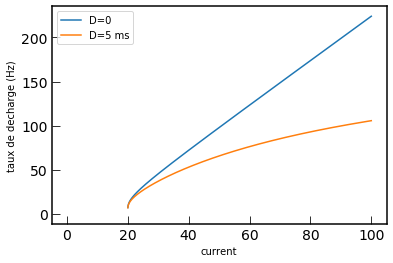

In [29]:
I = np.linspace(0,100,1000)

R = 1.
tau = 0.02
Theta = 20.
D = 0.005


f = lambda I: 1/(tau *np.log(R*I/(R*I - Theta)))
fPrime = lambda I: 1/(tau *np.log(R*I/(R*I - Theta)) + D)
plt.plot(I,f(I),label='D=0')
plt.plot(I,fPrime(I),label='D=5 ms')
plt.xlabel('current')
plt.ylabel('taux de decharge (Hz)')
plt.legend()